In [1]:


import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset
import h5py



Enter any number3
The average of this data is:  7.98e-06 
The standard deviation is:  1.48e-05 
The median is:  6.70e-06
The range of latitude in this file is:  -86.32902  to  89.957565 degrees 
The range of longitude in this file is:  -179.99791  to  179.99928  degrees

Would you like to create a map of this data? Please enter Y or N 
y
The average of this data is:  6.02e-06 
The standard deviation is:  1.70e-05 
The median is:  4.79e-06
The range of latitude in this file is:  -86.353195  to  89.97063 degrees 
The range of longitude in this file is:  -179.97658  to  179.98184  degrees

Would you like to create a map of this data? Please enter Y or N 
y
The average of this data is:  7.34e-06 
The standard deviation is:  2.05e-05 
The median is:  6.68e-06
The range of latitude in this file is:  -86.40759  to  89.96702 degrees 
The range of longitude in this file is:  -179.99757  to  179.9955  degrees

Would you like to create a map of this data? Please enter Y or N 
y


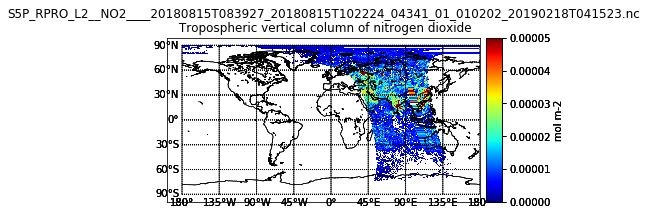

In [3]:
def SO2():
    try:
        fileList=open('so2.txt','r')
    except:
        print('Did not find a text file containing file names (perhaps name does not match)')
        sys.exit()
    
    # loops through all files listed in the text file
    #loops through all files listed in the text file
    for FILE_NAME in fileList:
        FILE_NAME=FILE_NAME.strip()
        user_input=input('\nWould you like to process\n' + FILE_NAME + '\n\n(Y/N)')
        if(user_input == 'N' or user_input == 'n'):
            print('Skipping...')
            continue
        else:
            file = Dataset(FILE_NAME, 'r')
            ds=file
            grp='PRODUCT'        
            lat= ds.groups[grp].variables['latitude'][0][:][:]
            lon= ds.groups[grp].variables['longitude'][0][:][:]
            if 'SO2' in FILE_NAME:
                sds_name='sulfurdioxide_total_vertical_column'
                map_label='mol/m2'
            if 'AER_AI' in FILE_NAME:
                sds_name='aerosol_index_354_388'
                map_label='Aerosol Index'
            data= ds.groups[grp].variables[sds_name]      
        
        #get necessary attributes 
            fv=data._FillValue
        
        #get lat and lon information 
            min_lat=np.min(lat)
            max_lat=np.max(lat)
            min_lon=np.min(lon)
            max_lon=np.max(lon)
        
        # set map labels
       # map_label = data.units
            map_title = data.long_name
            print(data.units)
    
        #get the data as an array and mask fill/missing values
            dataArray=np.array(data[0][:][:])
            dataArray[dataArray==fv]=np.nan
            data=dataArray
      #  data=data.reshape(xdim,ydim)
      
        
        #get statistics about data
            average=np.nanmean(dataArray)
            stdev=np.nanstd(dataArray)
            median=np.nanmedian(dataArray)
      # map_label='mol/cm2'
        
        #print statistics 
#        print('The average of this data is: ',round(average,3),'\nThe standard deviation is: ',round(stdev,3),'\nThe median is: ',round(median,3))
            print('The average of this data is: ','{:.2e}'.format(average),'\nThe standard deviation is: ','{:.2e}'.format(stdev),'\nThe median is: ','{:.2e}'.format(median))
            print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')
            is_map=input('\nWould you like to create a map of this data? Please enter Y or N \n')
        
        #if user would like a map, view it
            if is_map == 'Y' or is_map == 'y':
                data = np.ma.masked_array(data, np.isnan(data))
                m = Basemap(projection='cyl', resolution='l',
                        llcrnrlat=-90, urcrnrlat = 90,
                        llcrnrlon=-180, urcrnrlon = 180)
                m.drawcoastlines(linewidth=0.5)
                m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
                m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
                my_cmap = plt.cm.get_cmap('jet')
                my_cmap.set_under('w')
                vmin1=0.0
                vmax1=0.0005
                if 'AER_AI' in FILE_NAME:
                    vmin1=-2.0
                    vmax1=0.4
                m.pcolormesh(lon, lat, data, latlon=True, vmin=vmin1, vmax=vmax1,cmap=my_cmap)
                cb = m.colorbar()
                cb.set_label(map_label)
                plt.autoscale()
            #title the plot
                plt.title('{0}\n {1}'.format(FILE_NAME, map_title))
                fig = plt.gcf()
            # Show the plot window.
                
#         #once you close the map it asks if you'd like to save it
#             is_save=str(input('\nWould you like to save this map? Please enter Y or N \n'))
#             if is_save == 'Y' or is_save == 'y':
#                 #saves as a png if the user would like
#                 pngfile = '{0}.png'.format(FILE_NAME[:-3])
#                 fig.savefig(pngfile, dpi = 300)
        #close the hdf5 file 
            file.close()
    plt.show()
    
def CO():    
    try:
        fileList=open('fl.txt','r')
    except:
        print('Did not find a text file containing file names (perhaps name does not match)')
        sys.exit()
        
    # loops through all files listed in the text file
    for FILE_NAME in fileList:
        FILE_NAME=FILE_NAME.strip()
#     user_input=input('\nWould you like to process\n' + FILE_NAME + '\n\n(Y/N)')
#     if(user_input == 'N' or user_input == 'n'):
#         print('Skipping...')
#         continue
#     else:
        file = Dataset(FILE_NAME, 'r')
# read the data
        ds=file
        grp='PRODUCT'        
        lat= ds.groups[grp].variables['latitude'][0][:][:]
        lon= ds.groups[grp].variables['longitude'][0][:][:]
        if 'CO' in FILE_NAME:
            sds_name='carbonmonoxide_total_column'
#             map_label='mol/m2'
        if 'AER_AI' in FILE_NAME:
            sds_name='aerosol_index_354_388'
            map_label='Aerosol Index'
        data= ds.groups[grp].variables[sds_name]      
        
        #get necessary attributes 
        fv=data._FillValue
        
        #get lat and lon information 
        min_lat=np.min(lat)
        max_lat=np.max(lat)
        min_lon=np.min(lon)
        max_lon=np.max(lon)
        
        # set map labels
        map_label = data.units
        map_title = data.long_name
        print(data.units)
    
        #get the data as an array and mask fill/missing values
        dataArray=np.array(data[0][:][:])
        dataArray[dataArray==fv]=np.nan
        data=dataArray
      #  data=data.reshape(xdim,ydim)
      
        
        #get statistics about data
        average=np.nanmean(dataArray)
        stdev=np.nanstd(dataArray)
        median=np.nanmedian(dataArray)
      # map_label='mol/cm2'
        
        #print statistics 
#        print('The average of this data is: ',round(average,3),'\nThe standard deviation is: ',round(stdev,3),'\nThe median is: ',round(median,3))
        print('The average of this data is: ','{:.2e}'.format(average),'\nThe standard deviation is: ','{:.2e}'.format(stdev),'\nThe median is: ','{:.2e}'.format(median))
        print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')
        is_map=input('\nWould you like to create a map of this data? Please enter Y or N \n')
        
        #if user would like a map, view it
        if is_map == 'Y' or is_map == 'y':
            data = np.ma.masked_array(data, np.isnan(data))
            m = Basemap(projection='cyl', resolution='l',
                        llcrnrlat=-90, urcrnrlat = 90,
                        llcrnrlon=-180, urcrnrlon = 180)
            m.drawcoastlines(linewidth=0.5)
            m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
            m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
            my_cmap = plt.cm.get_cmap('jet')
            my_cmap.set_under('w')
            vmin1=0.0
            vmax1=0.05
            if 'AER_AI' in FILE_NAME:
                vmin1=-2.0
                vmax1=0.4
            m.pcolormesh(lon, lat, data, latlon=True, vmin=vmin1, vmax=vmax1,cmap=my_cmap)
            cb = m.colorbar()
            cb.set_label(map_label)
            
           
            #title the plot
            plt.title('{0}\n {1}'.format(FILE_NAME, map_title))
            fig = plt.gcf()
            # Show the plot window.
            plt.autoscale()        
            
           
         #once you close the map it asks if you'd like to save it
#             is_save=str(input('\nWould you like to save this map? Please enter Y or N \n'))
#             if is_save == 'Y' or is_save == 'y':
#                 #saves as a png if the user would like
#                 pngfile = '{0}.png'.format(FILE_NAME[:-3])
#                 fig.savefig(pngfile, dpi = 300)
        #close the hdf5 file 
        file.close()
#     print('The average of this data is: ','{:.2e}'.format(average),'\nThe standard deviation is: ','{:.2e}'.format(stdev),'\nThe median is: ','{:.2e}'.format(median))
#     print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')
#     is_map=input('\nWould you like to create a map of this data? Please enter Y or N \n')
    plt.show()
    
def NO2():
    try:
        fileList=open('filelist.txt','r')
    except:
        print('Did not find a text file containing file names (perhaps name does not match)')
        sys.exit()
        
    # loops through all files listed in the text file
    for FILE_NAME in fileList:
        FILE_NAME=FILE_NAME.strip()
#     user_input=input('\nWould you like to process\n' + FILE_NAME + '\n\n(Y/N)')
#     if(user_input == 'N' or user_input == 'n'):
#         print('Skipping...')
#         continue
#     else:
        file = Dataset(FILE_NAME, 'r')
# read the data
        ds=file
        grp='PRODUCT'        
        lat= ds.groups[grp].variables['latitude'][0][:][:]
        lon= ds.groups[grp].variables['longitude'][0][:][:]
        if 'NO2' in FILE_NAME:
            sds_name='nitrogendioxide_tropospheric_column'
            map_label='mol/m2'
        if 'AER_AI' in FILE_NAME:
            sds_name='aerosol_index_354_388'
            map_label='Aerosol Index'
        data= ds.groups[grp].variables[sds_name]      
        
        #get necessary attributes 
        fv=data._FillValue
        
        #get lat and lon information 
        min_lat=np.min(lat)
        max_lat=np.max(lat)
        min_lon=np.min(lon)
        max_lon=np.max(lon)
        
        # set map labels
        map_label = data.units
        map_title = data.long_name
#         print(data.units)
    
        #get the data as an array and mask fill/missing values
        dataArray=np.array(data[0][:][:])
        dataArray[dataArray==fv]=np.nan
        data=dataArray
      #  data=data.reshape(xdim,ydim)
      
        
        #get statistics about data
        average=np.nanmean(dataArray)
        stdev=np.nanstd(dataArray)
        median=np.nanmedian(dataArray)
      # map_label='mol/cm2'
        
        #print statistics 
#        print('The average of this data is: ',round(average,3),'\nThe standard deviation is: ',round(stdev,3),'\nThe median is: ',round(median,3))
        print('The average of this data is: ','{:.2e}'.format(average),'\nThe standard deviation is: ','{:.2e}'.format(stdev),'\nThe median is: ','{:.2e}'.format(median))
        print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')
        is_map=input('\nWould you like to create a map of this data? Please enter Y or N \n')
        
        #if user would like a map, view it
        if is_map == 'Y' or is_map == 'y':
            data = np.ma.masked_array(data, np.isnan(data))
            m = Basemap(projection='cyl', resolution='l',
                        llcrnrlat=-90, urcrnrlat = 90,
                        llcrnrlon=-180, urcrnrlon = 180)
            m.drawcoastlines(linewidth=0.5)
            m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
            m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
            my_cmap = plt.cm.get_cmap('jet')
            my_cmap.set_under('w')
            vmin1=0.00
            vmax1=0.00005
            if 'AER_AI' in FILE_NAME:
                vmin1=0.00000
                vmax1=0.11387
            m.pcolormesh(lon, lat, data, latlon=True, vmin=vmin1, vmax=vmax1,cmap=my_cmap)
            cb = m.colorbar()
            cb.set_label(map_label)
            
           
            #title the plot
            plt.title('{0}\n {1}'.format(FILE_NAME, map_title))
            fig = plt.gcf()
            # Show the plot window.
            plt.autoscale()    
#             plt.show()
            
           
         #once you close the map it asks if you'd like to save it
#             is_save=str(input('\nWould you like to save this map? Please enter Y or N \n'))
#             if is_save == 'Y' or is_save == 'y':
#                 #saves as a png if the user would like
#                 pngfile = '{0}.png'.format(FILE_NAME[:-3])
#                 fig.savefig(pngfile, dpi = 300)
        #close the hdf5 file 
        file.close()
# print('The average of this data is: ','{:.2e}'.format(average),'\nThe standard deviation is: ','{:.2e}'.format(stdev),'\nThe median is: ','{:.2e}'.format(median))
# print('The range of latitude in this file is: ',min_lat,' to ',max_lat, 'degrees \nThe range of longitude in this file is: ',min_lon, ' to ',max_lon,' degrees')
# is_map=input('\nWould you like to create a map of this data? Please enter Y or N \n')
    plt.show()
    
v=int(input('Enter any number'))
if(v==1):
    SO2()
elif (v==2):
    CO()
elif (v==3):
    NO2()
else:
    print('Invalid')
